In [ ]:
pip install ucimlrepo

In [ ]:
# General
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

# Machine Learning Model and Splitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor

## Data Understanding

In [ ]:
# Fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# Insert data into dataframe
X = breast_cancer_wisconsin_original.data.features
Y = breast_cancer_wisconsin_original.data.targets

# Metadata
print(breast_cancer_wisconsin_original.metadata)

# Variable Information
print(breast_cancer_wisconsin_original.variables)

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB


In [ ]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   699 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


## Data Preparation

In [ ]:
df = pd.concat([X, Y], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [ ]:
df.isna().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
df.sample(10)

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
241,3,1,1,3,1,1.0,3,1,1,2
120,1,1,2,2,2,1.0,3,1,1,2
265,5,1,4,1,2,1.0,3,2,1,2
322,3,1,1,1,2,1.0,3,1,1,2
223,7,5,6,3,3,8.0,7,4,1,4
97,5,1,1,1,2,1.0,3,1,1,2
92,4,1,1,1,2,1.0,3,1,1,2
146,3,4,5,2,6,8.0,4,1,1,4
47,1,1,1,1,2,1.0,2,1,1,2
675,4,1,4,1,2,1.0,1,1,1,2


## Data Visualization

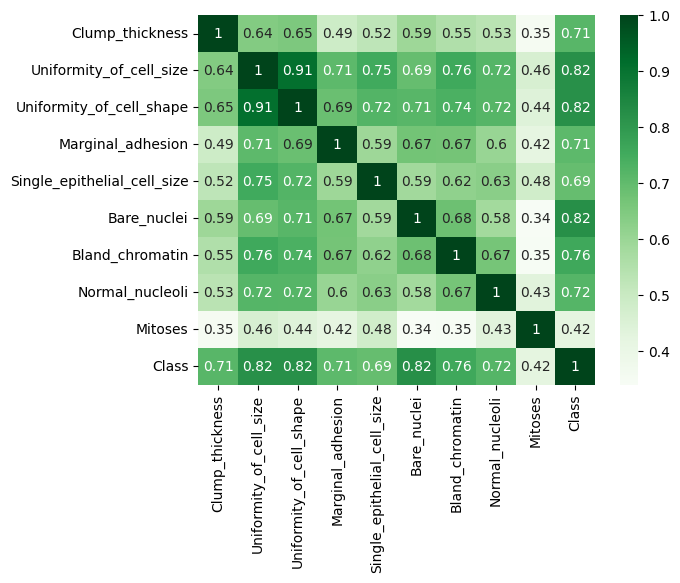

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap = 'Greens')
plt.show()

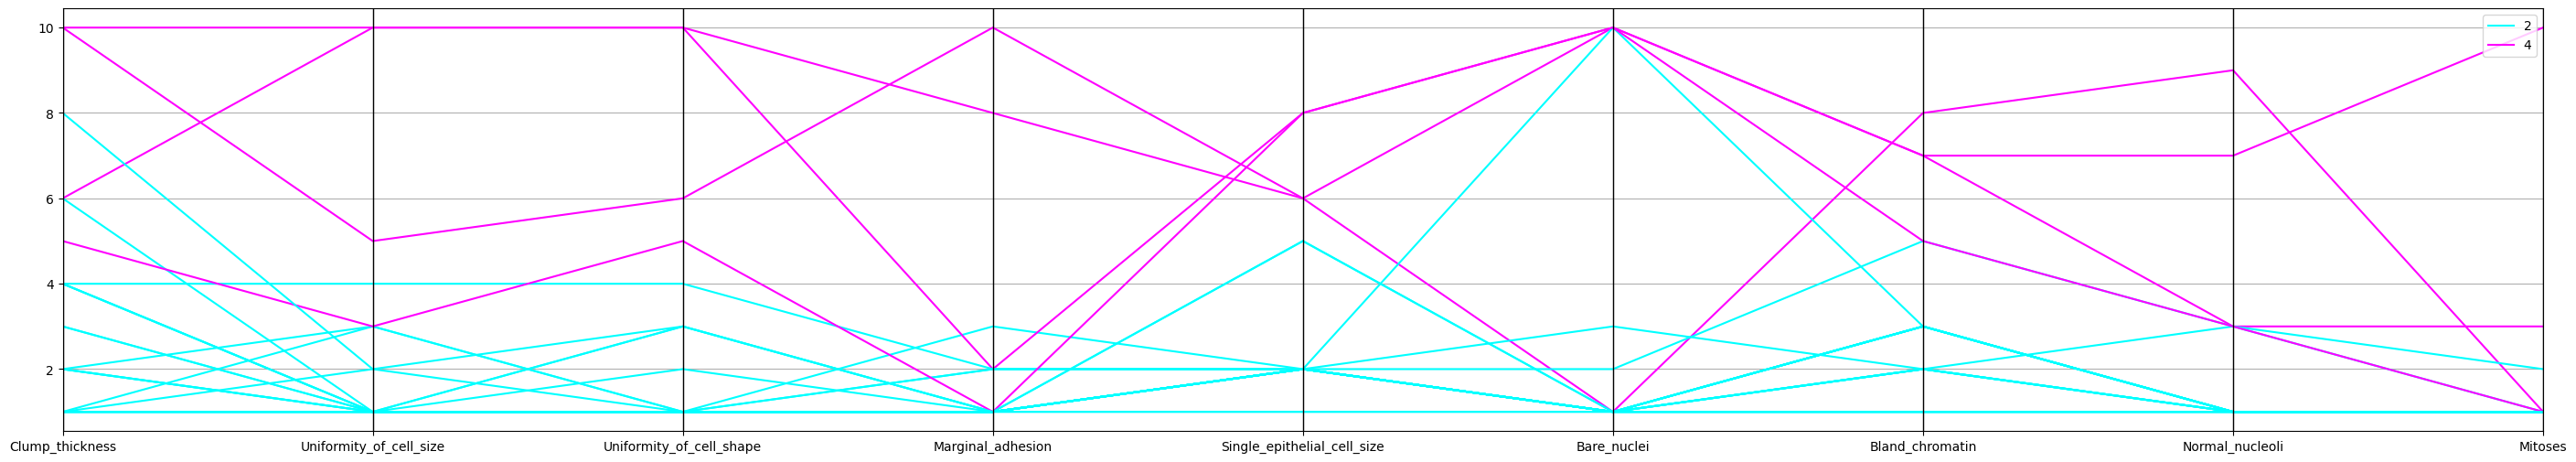

In [ ]:
dftemp = df.sample(25)
plt.figure(figsize=(35, 6))
parallel_coordinates(dftemp, 'Class', colormap='cool')
plt.show()

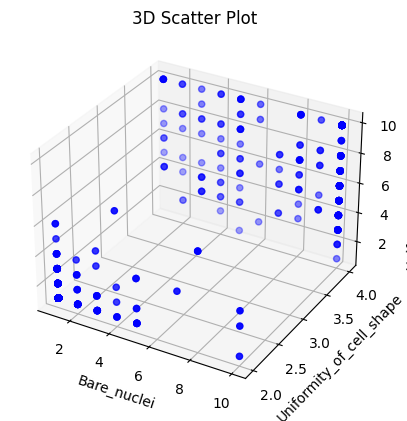

In [ ]:
x = df['Bare_nuclei']
y = df['Class']
z = df['Uniformity_of_cell_shape']

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(x, y, z, c='b', marker='o')

# Set labels and title
ax.set_xlabel('Bare_nuclei')
ax.set_ylabel('Uniformity_of_cell_shape')
ax.set_zlabel('Uniformity_of_cell_shape')
ax.set_title('3D Scatter Plot')

# Show plot
plt.show()

In [ ]:
# Create a 3D scatter plot
fig = px.scatter_3d(df, x='Bare_nuclei', y='Uniformity_of_cell_shape', z='Single_epithelial_cell_size', color='Class')
fig.show()

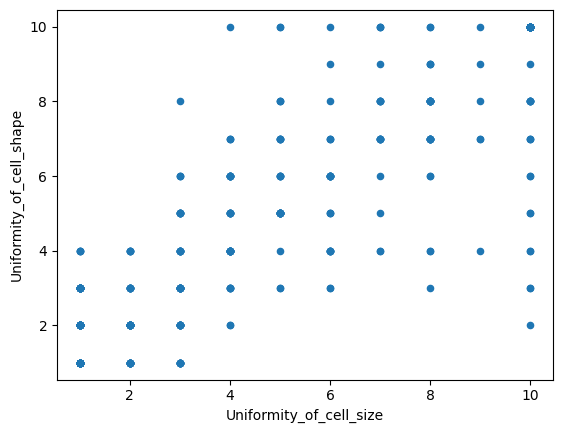

In [ ]:
df.plot(kind='scatter', x='Uniformity_of_cell_size', y='Uniformity_of_cell_shape')
plt.show()

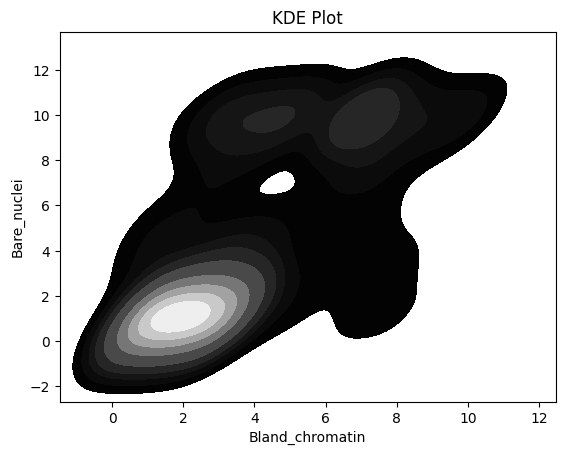

In [ ]:
sns.kdeplot(x='Bland_chromatin', y='Bare_nuclei', data=df, fill=True, cmap='gray')
plt.title('KDE Plot')
plt.show()

## Modeling and Evaluation

In [ ]:
x = df.drop(['Class'], axis=1)
y = df['Class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

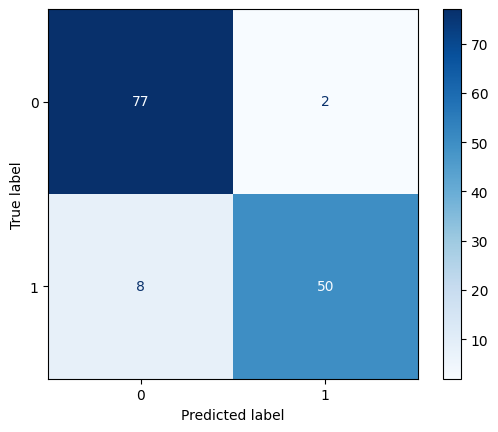

In [ ]:
cm = confusion_matrix(y_test, dt_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred, pos_label=4)
roc_auc = roc_auc_score(y_test, dt_pred)

In [ ]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("ROC-AUC Score:", roc_auc)

Accuracy:  0.927007299270073
Precision:  0.9615384615384616
ROC-AUC Score: 0.9183762549105193


Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)

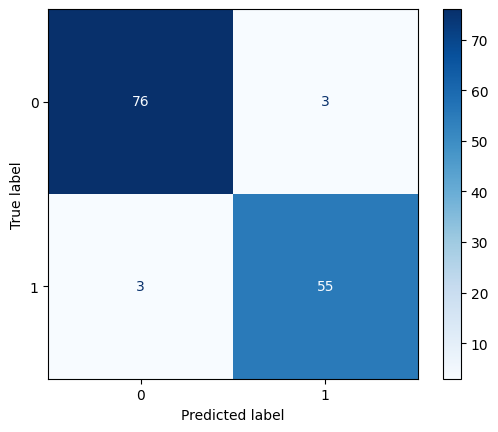

In [ ]:
cm = confusion_matrix(y_test, nb_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, nb_pred)
precision = precision_score(y_test, nb_pred, pos_label=4)
roc_auc = roc_auc_score(y_test, nb_pred)

In [ ]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("ROC-AUC Score:", roc_auc)

Accuracy:  0.9562043795620438
Precision:  0.9482758620689655
ROC-AUC Score: 0.9551505892623309


Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

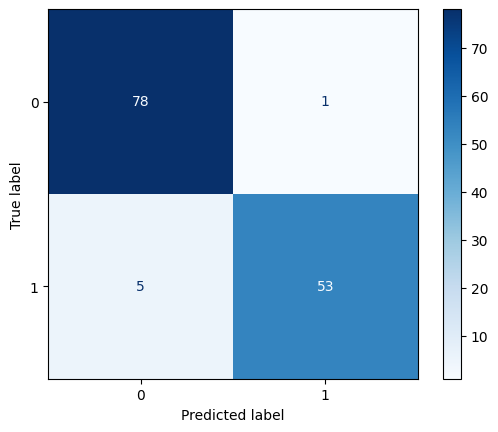

In [ ]:
cm = confusion_matrix(y_test, lr_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, lr_pred)
precision = precision_score(y_test, lr_pred, pos_label=4)
roc_auc = roc_auc_score(y_test, lr_pred)

In [ ]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("ROC-AUC Score:", roc_auc)

Accuracy:  0.9562043795620438
Precision:  0.9814814814814815
ROC-AUC Score: 0.9505674378000872


SVM

In [ ]:
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)

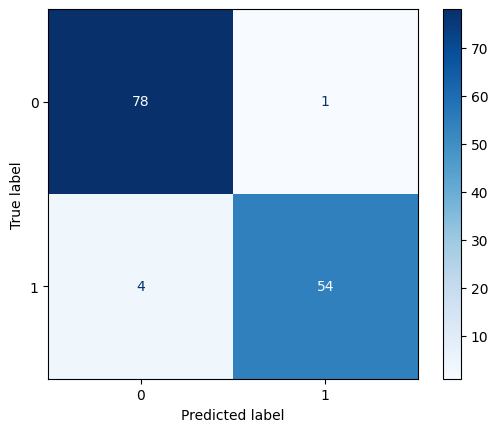

In [ ]:
cm = confusion_matrix(y_test, svm_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred, pos_label=4)
roc_auc = roc_auc_score(y_test, svm_pred)

In [ ]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("ROC-AUC Score:", roc_auc)

Accuracy:  0.9635036496350365
Precision:  0.9818181818181818
ROC-AUC Score: 0.9591881274552597


Model Accuracy Comparison

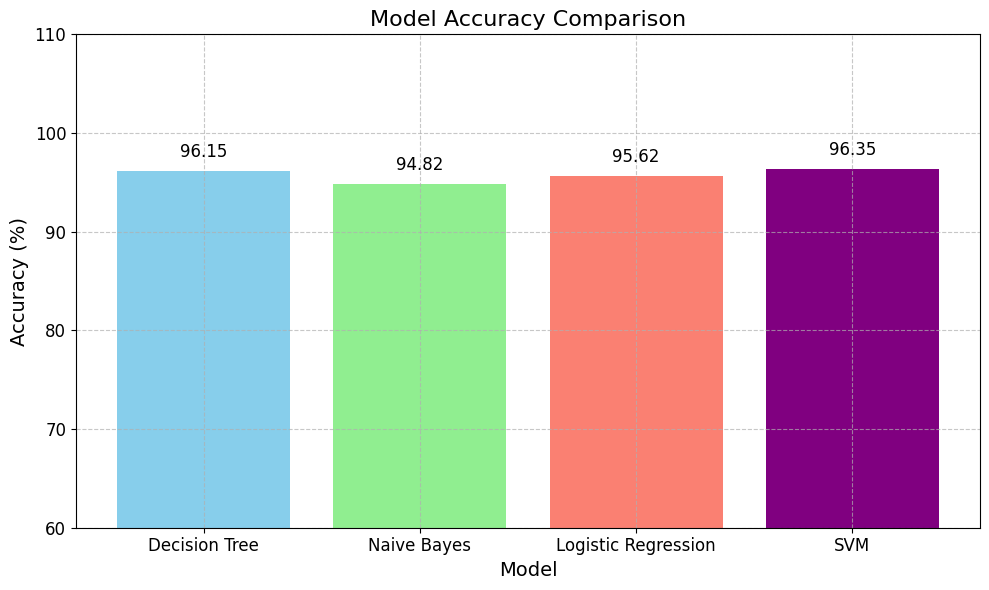

In [ ]:
model = ['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'SVM']
accuracy = [96.15, 94.82, 95.62, 96.35]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(model, accuracy, capsize=5, color=['skyblue', 'lightgreen', 'salmon', 'purple'])

ax.set_title('Model Accuracy Comparison', fontsize=16)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_ylim(60, 110)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, float(yval), ha='center', va='bottom', fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Model Precision Comparison

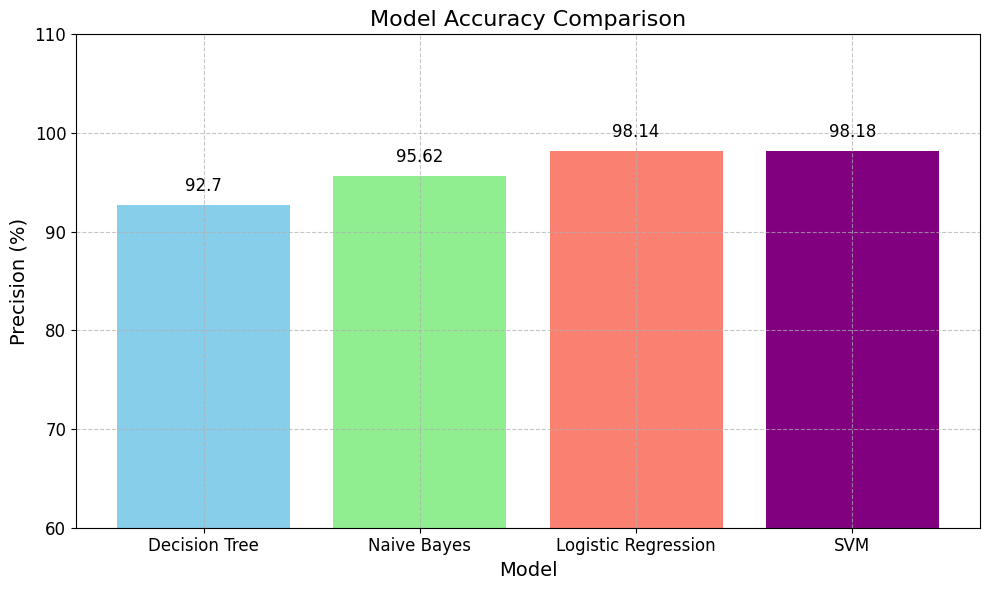

In [ ]:
model = ['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'SVM']
precision = [92.70, 95.62, 98.14, 98.18]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(model, precision, capsize=5, color=['skyblue', 'lightgreen', 'salmon', 'purple'])

ax.set_title('Model Accuracy Comparison', fontsize=16)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Precision (%)', fontsize=14)
ax.set_ylim(60, 110)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, float(yval), ha='center', va='bottom', fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Model ROC-AUC Comparison

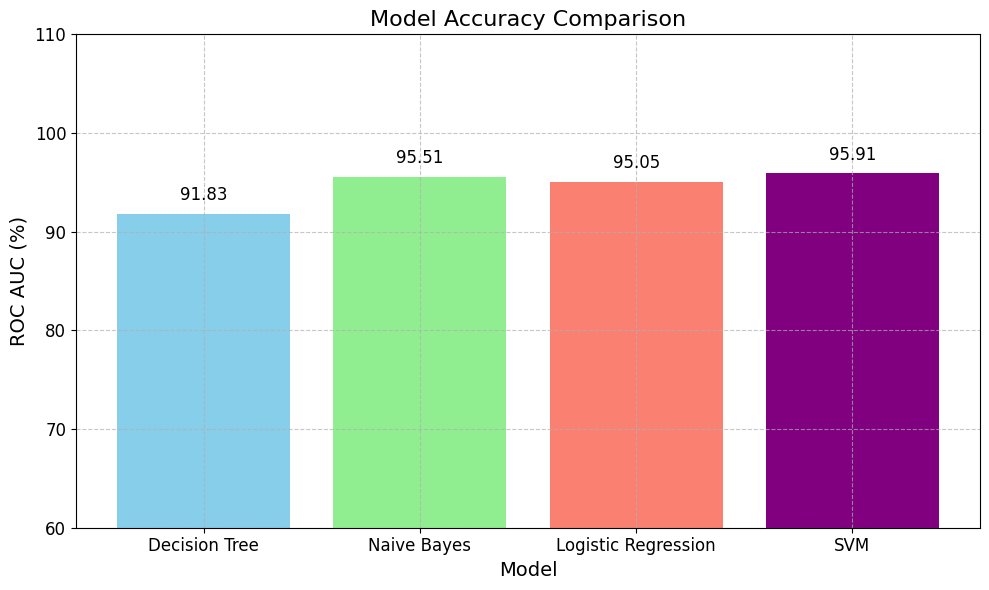

In [ ]:
model = ['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'SVM']
roc_auc = [91.83, 95.51, 95.05, 95.91]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(model, roc_auc, capsize=5, color=['skyblue', 'lightgreen', 'salmon', 'purple'])

ax.set_title('Model Accuracy Comparison', fontsize=16)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('ROC AUC (%)', fontsize=14)
ax.set_ylim(60, 110)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, float(yval), ha='center', va='bottom', fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()